# <b> Digit classification with Neural networks using MNIST and Keras </b>

---

## Objetivos

En este proyecto voy a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaré Keras con TensorFlow.

Con este proyecto se busca:
- Comprender el uso de redes neuronales en clasificación de imágenes
- Familiarizarse con el dataset MNIST
- Implementar un modelo de red neuronal
- Evaluar el rendimiento del modelo

## Descripción del proyecto

El dataset que voy a utilizar es MNIST. Este dataset se usa mucho en campos como la docencia, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. 
Las imágenes pretenden representar los números del 0 al 9 escritos a mano en un tamaño de 28x28 píxeles.

En el siguiente [enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST) hay más información sobre el dataset.

---

### <b> Carga de los datos </b>

In [45]:
from keras.datasets.mnist import load_data #Importo la función load_data de MNIST, que se usa para cargar las imágenes y las etiquetas de los dígitos
import tensorflow as tf

In [46]:
mnist = tf.keras.datasets.mnist # Guardo la referencia del dataset en la variable mnist

(training_images, training_labels), (test_images, test_labels) = load_data() # Cargo el dataset y lo divido en datos de entrenamiento (imágenes y etiquetas) y test (imágenes y etiquetas)

El dataset MNIST está guardado internamente en Keras, por lo que se puede utilizar sin necesidad de buscar el dataset de forma externa.

Llamar a **load_data** en me proporciona 2 conjuntos de 2 listas, estos serán los valores de entrenamiento y test para los gráficos que contienen los dígitos y sus etiquetas.

### <b> Información sobre el dataset </b>

Con los datos cargados en memoria, vamos a obtener información sobre ellos.

#### ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [47]:
print("Shape de training_images:", training_images.shape)
print("Shape de test_images:", test_images.shape)

Shape de training_images: (60000, 28, 28)
Shape de test_images: (10000, 28, 28)


Vemos que hay 60.000 imágenes para el conjunto de entrenamiento y 10.000 para el conjunto de test. En ambos conjunto las imágenes tienen un tamaño de 28x28.

Represento la primera imagen con el fin de conocer mejor la naturaleza del dataset.

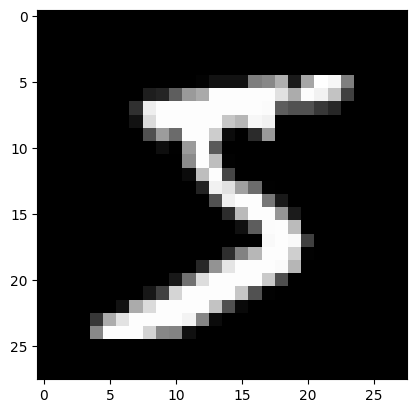

Su etiqueta asignada es: 5
__________________________________________
Matriz de la primera imagen:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39  

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# En la mayoría de casos es preferible trabajar con imágenes en blanco y negro, ya que requieren menos procesamiento (solo un canal).
plt.imshow(training_images[0], cmap="gray") # Muestro la primera imagen del dataset de entrenamiento en blanco y negro
plt.show()

np.set_printoptions(linewidth=200)                          # Configuro la salida para que la matriz tenga espacio horizontal suficiente para mostrarse correctamente.
print(f"Su etiqueta asignada es: {training_labels[0]}")     # Muestro la etiqueta que tiene asignada la primera imagen
print("_"*42)
print("Matriz de la primera imagen:\n", training_images[0]) # Muestro cómo se almacena la primera imagen en escala de grises


Cada imagen guardada consiste en una matriz de 28x28 píxeles, donde cada número en la matriz es un valor de intensidad de gris que va de 0 (negro) a 255 (blanco). 

La información en Y (las etiquetas) es el dígito que la imagen representa, un número entre 0 y 9, que es la respuesta correcta para cada imagen. Estas etiquetas se utilizarán durante el entrenamiento de la red neuronal para saber qué salida debería producirse cuando se muestra una imagen.

### **Normalización y preprocesado de los datos**

#### Normalización

Todos los valores numéricos están entre 0 y 255. Para entrenar redes neuronales, es una buena práctica transformar todos los valores a un rango entre 0 y 1, lo que se habitualmente se llama "normalización".

In [49]:
# Divido entre 255 los valores para normalizar a un rango de 0 a 1
training_images = training_images / 255.0
test_images = test_images / 255.0

#### Conversión a vectores de 1 dimensión

Las redes neuronales suelen trabajar con vectores de una única dimensión como entrada. Por tanto, es necesario reducir las imágenes que tengo de 28x28 píxeles (2 dimensiones), tienen que transformarse en vectores de 784 valores (28*28 = 784).
Con esto se facilita el cálculo y procesamiento de los pesos en las capas de la red neuronal.


In [50]:
# Cambia la forma de los datos de entrenamiento y test para que sean vectores de tamaño 784
# "-1" permite que NumPy ajuste automáticamente la primera dimensión según el número total de imágenes.
training_images = training_images.reshape(-1, 28*28) 
test_images = test_images.reshape(-1, 28*28)

print(f"Nueva forma de training_images después del cambio: {training_images.shape}")
print(f"Nueva forma de test_images después del cambio: {test_images.shape}")

Nueva forma de training_images después del cambio: (60000, 784)
Nueva forma de test_images después del cambio: (10000, 784)


Se obtienen 60000 imágenes en el conjunto de entrenamiento, donde cada imagen está representada en 1 único vector por 784 píxeles. Lo mismo ocurre en el conjunto de test, donde se han obtenido 10000 imágenes.

#### One-hot encoding

In [51]:
print("\nEtiqueta antes de one-hot encoding:", training_labels[0]) # Por defecto viene almacenado como un número entero, 5 en este caso.
print(f"Forma de test_labels antes del cambio: {test_labels.shape}")
print(f"Forma de training_labels antes del cambio: {training_labels.shape}")

# Aplico one-hot encoding a las etiquetas de entrenamiento y test
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


print("\nEtiqueta después de one-hot encoding:", training_labels[0]) #Era un 5 antes de aplicarlo
print("Nueva forma de test_labels:", test_labels.shape)
print("Nueva forma de training_labels:", training_labels.shape)


Etiqueta antes de one-hot encoding: 5
Forma de test_labels antes del cambio: (10000,)
Forma de training_labels antes del cambio: (60000,)

Etiqueta después de one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Nueva forma de test_labels: (10000, 10)
Nueva forma de training_labels: (60000, 10)


Se aplicó One-hot-encoding a las etiquetas para facilitar la predicción y evitar confusiones entre números cercanos, ya que solo es posible tener una posición activada. 

Para el ejemplo expuesto la etiqueta corresponde al número "5", pero al aplicar One-hot-encoding, se representa como un vector de 10 posiciones en el que solo la 6ª posición estará activada.
- 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Esto facilita el procesamiento y hace más eficiente el entrenamiento de la red neuronal.

### **Creación del modelo**